# Pràctica 1 APC

##### By Jordi Gonzalez, Daniel Alcover, Alex Galvany

### Introducció

Aquesta practica consisteix a, en base a un dataset, aprendre a analitzar la correlacio existent entre els diferents atributs. Aprendre a fer regressions i poder entrenar models i realitzar prediccions molt acertades d'un atribut escollit.

### Apartat (C): Analitzant Dades

#### Carreguem el nostre dataset i construim les llibreries i dependències

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('db\\day.csv')
dataset_copy = load_dataset('db\\day.csv')
dataset_gradient = load_dataset('db\\day.csv')
data = dataset.values

x = data[:, :15]
y = data[:, 14]

Aquestes son les funcions proporcionades:

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import sklearn

def mean_squared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_t = x_train - mean
    x_t /= std
    return x_t

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

Per tal de veure si hi ha valors nulls al dataset fem el següent:

In [3]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Com veiem que no hi ha cap valor null, no cal fer mes comprovacions o controls sobre les dades en quant a valors nulls.

També cal tenir clars el tipus que són cada atribut:

In [4]:
dataset.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

A continuació, hem generat histogrames de cada atribut per veure el tipus de distribució que aquests tenen:

<IPython.core.display.Javascript object>


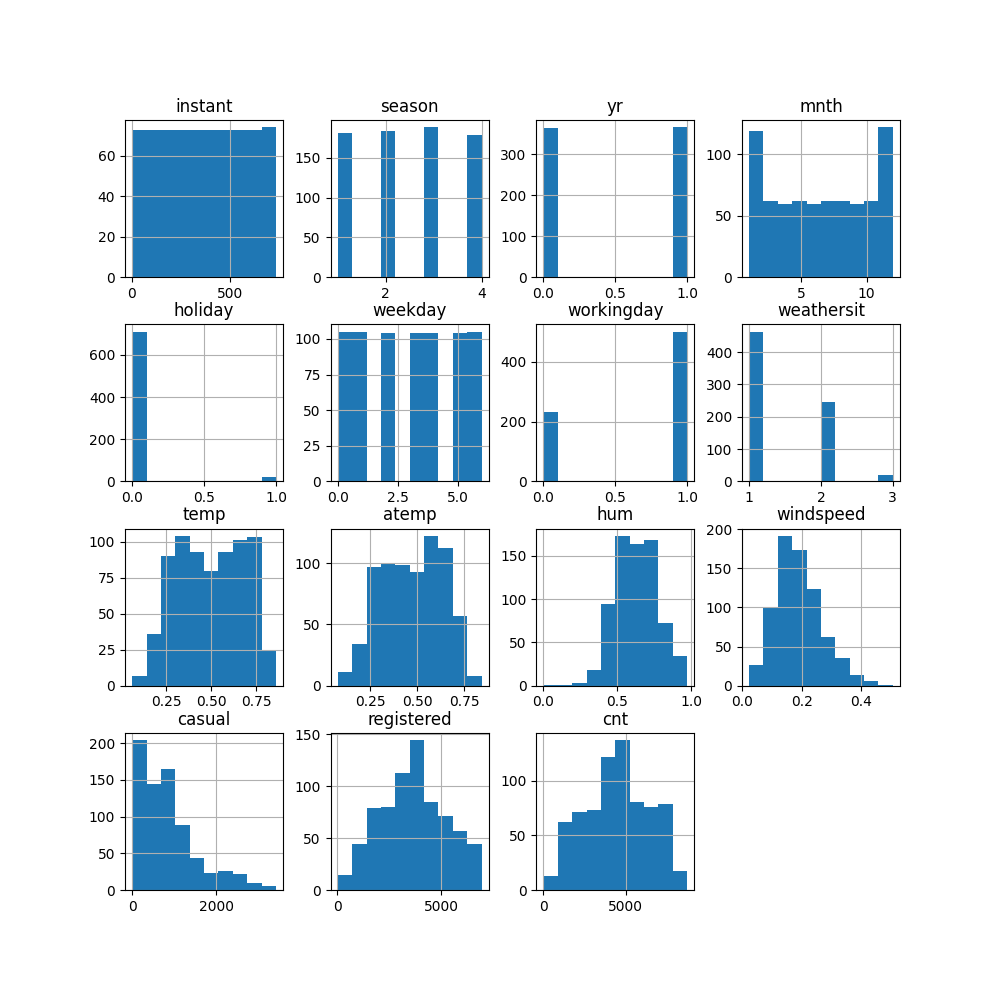

array([[<AxesSubplot: title={'center': 'instant'}>,
        <AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'yr'}>,
        <AxesSubplot: title={'center': 'mnth'}>],
       [<AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'weekday'}>,
        <AxesSubplot: title={'center': 'workingday'}>,
        <AxesSubplot: title={'center': 'weathersit'}>],
       [<AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'hum'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'casual'}>,
        <AxesSubplot: title={'center': 'registered'}>,
        <AxesSubplot: title={'center': 'cnt'}>, <AxesSubplot: >]],
      dtype=object)

In [5]:
dataset.hist(figsize=(10,10))

# Apartat (B): Primeres regressions

## Correlació de les dades

In [6]:
corr = dataset.corr()['cnt'].sort_values(ascending=False)
print(corr)

cnt           1.000
registered    0.946
casual        0.673
atemp         0.631
instant       0.629
temp          0.627
yr            0.567
season        0.406
mnth          0.280
weekday       0.067
workingday    0.061
holiday      -0.068
hum          -0.101
windspeed    -0.235
weathersit   -0.297
Name: cnt, dtype: float64


Aquí veiem quins atributs són els que tenen més correlació amb el nostre atribut objectiu "cnt"

Podem concloure que els atributs, atemp( sensació tèrmica), "registered" i "casual" són els més rellevants.

## Normalització i estandardització de les dades

El següent pas ha estat observar histogrames sobre el dataset complet i així poder veure les diferències en les relacions dels atributs d'aquest, per saber si usar el dataset tal com ve o usar estandarditzat.
Amb aquestes tres gràfiques següents hem pogut observar que la millor opció és utilitzar el dataset després de ser estandarditzat, ja que té una distribució més Gaussiana que la resta:

<IPython.core.display.Javascript object>


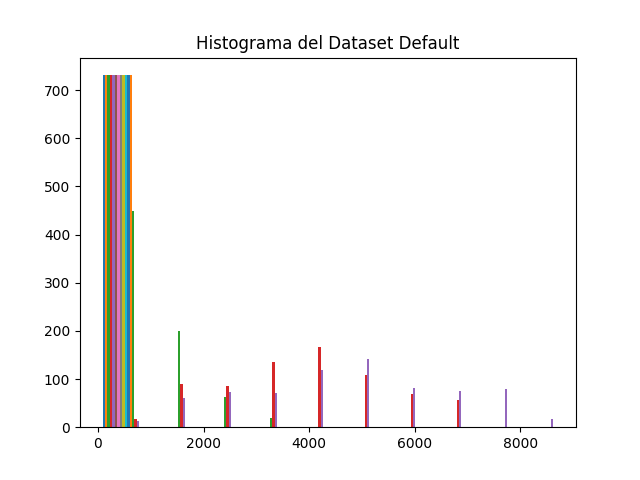

In [9]:
#Dataset default
plt.title('Histograma del Dataset Default')
plt.hist(dataset)
plt.show()


<IPython.core.display.Javascript object>


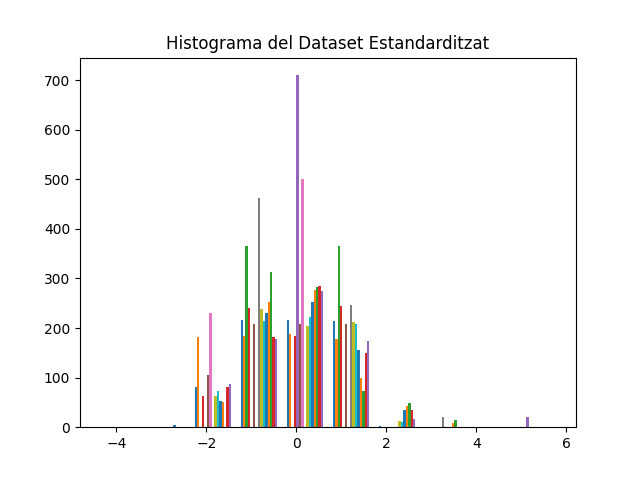

In [10]:
#Estandardització 
scaler = StandardScaler()
scaler.fit(dataset)
standard = scaler.transform(dataset)
plt.title('Histograma del Dataset Estandarditzat')
plt.hist(standard)
plt.show()

C:\Users\Jordi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>


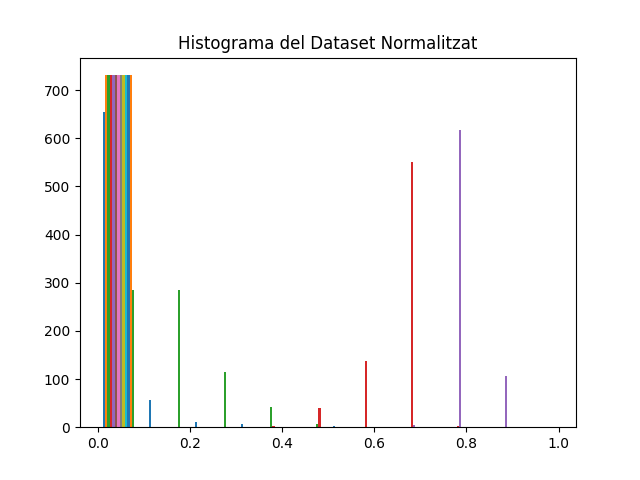

In [11]:
#Normalització
normal = Normalizer().transform(dataset)
plt.title('Histograma del Dataset Normalitzat')
plt.hist(normal)
plt.show()

# Regressions Lineals

Regressió estandarditzada lineal:

<IPython.core.display.Javascript object>


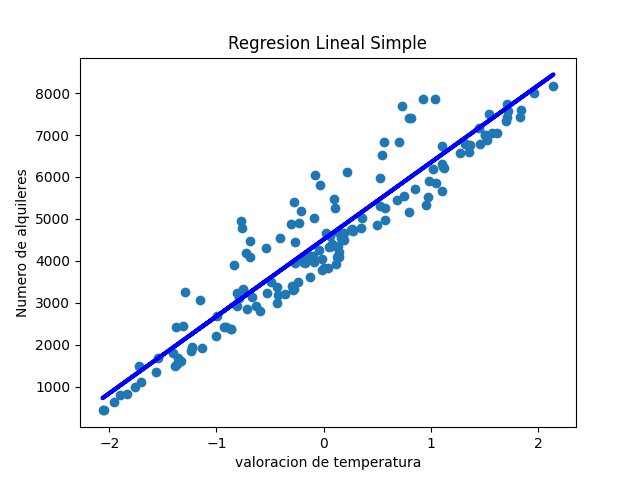

In [12]:
x = data[:,np.newaxis,13]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

plt.scatter(x_norm_test,y_test)
plt.plot(x_norm_test,prediction,color='blue',linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('valoracion de temperatura')
plt.ylabel('Numero de alquileres')
plt.show()

Quan ja tenim la predicció feta, cal extreure el MSE per saber la correlació que hi ha entre l'atribut objectiu i l'atribut escollit. S'ha usat la funció proporcionada i una funció de la llibreria sklearn per treure el score, que, al cap i a la fi, representen el mateix:

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score: ", r2_score(y_test, prediction))

Mean squeared error:  416350.8613513536
R2 Score:  0.8872981103710956


A continuació estem fent la funcionalitat de normalitzar les dades que ho fem sobre una còpia del dataset a part per evitar modificar dades que altres utilitzin:

In [14]:
dataset_copy=dataset_copy.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
dataset_normalized=(dataset_copy - dataset_copy.min()) / ( dataset_copy.max() - dataset_copy.min())
dataset_normalized

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.500,0.355,0.374,0.829,0.285,0.097,0.092,0.111
1,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.379,0.361,0.716,0.466,0.038,0.094,0.090
2,0.003,0.000,0.000,0.000,0.000,0.167,1.000,0.000,0.171,0.145,0.450,0.466,0.035,0.175,0.153
3,0.004,0.000,0.000,0.000,0.000,0.333,1.000,0.000,0.176,0.175,0.607,0.284,0.031,0.207,0.177
4,0.005,0.000,0.000,0.000,0.000,0.500,1.000,0.000,0.209,0.197,0.449,0.339,0.023,0.216,0.182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.995,0.000,1.000,1.000,0.000,0.667,1.000,0.500,0.243,0.194,0.671,0.676,0.072,0.267,0.241
727,0.996,0.000,1.000,1.000,0.000,0.833,1.000,0.500,0.242,0.231,0.607,0.274,0.188,0.351,0.354
728,0.997,0.000,1.000,1.000,0.000,1.000,0.000,0.500,0.242,0.214,0.774,0.210,0.046,0.168,0.152
729,0.999,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.245,0.200,0.497,0.677,0.106,0.204,0.204


Després usem aquest dataset normalitzat per fer regressions lineals:

In [15]:
data = dataset_normalized.values
x = data[:, :15]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

In [16]:
y_test = y_test.to_numpy()

print("Mean squeared error: ", mean_squared_error(prediction, y_test))
print("R2 Score: ", r2_score(y_test, prediction))

Mean squeared error:  36897.09961599354
R2 Score:  0.990485893153709


Després fem regressió lineal escollint només les columnes sense informació rellevant eliminades:

In [17]:
x = np.zeros((731,3))
x[ : , 2] = data[ : , 9]
x[ : , 0] = data[ : , 12]
x[ : , 1] = data[ : , 13]

y = dataset['cnt']

x_train, y_train, x_test, y_test = split_data(x, y)

x_norm_train = standarize(x_train)

x_norm_test = standarize(x_test)

regr = regression(x_norm_train,y_train)

prediction = regr.predict(x_norm_test)

In [18]:
y_test = y_test.to_numpy()

print("Mean squared error: ", mean_squared_error(prediction, y_test))
print("R2 Score: ", r2_score(y_test, prediction))

Mean squared error:  7608.667455430905
R2 Score:  0.9977158228944063


# Apartat (A): El descens del gradient  

Primer pas cal crear la funció que duu a terme el descens complet:

In [19]:
def GradientDescent(x,y,learning_rate,iterations):
    t = 0
    s = 5
    n = x.shape[0]
    for _ in range(iterations):
            t_gradient = -2 * np.sum(y - (s*x + t))/n
            s_gradient = -2 * np.sum(x*(y - (s*x + t)))/n
            
            t = t - (learning_rate * t_gradient)
            s = s - (learning_rate * s_gradient)

            t = t - (learning_rate * t_gradient)
            s = s - (learning_rate * s_gradient)
    return s*X + t,t,s

A continuació, agafar les dades que volem usar:

In [20]:
plt.rcParams['figure.figsize'] = (10, 7.0)
data=dataset_gradient.values
X = data[:,13]
Y = dataset_gradient['cnt']

Finalment, usem la funció i generem el gràfic:

C:\Users\Jordi\AppData\Local\Temp\ipykernel_12964\874385134.py:10: RuntimeWarning: invalid value encountered in double_scalars
  s = s - (learning_rate * s_gradient)


<IPython.core.display.Javascript object>


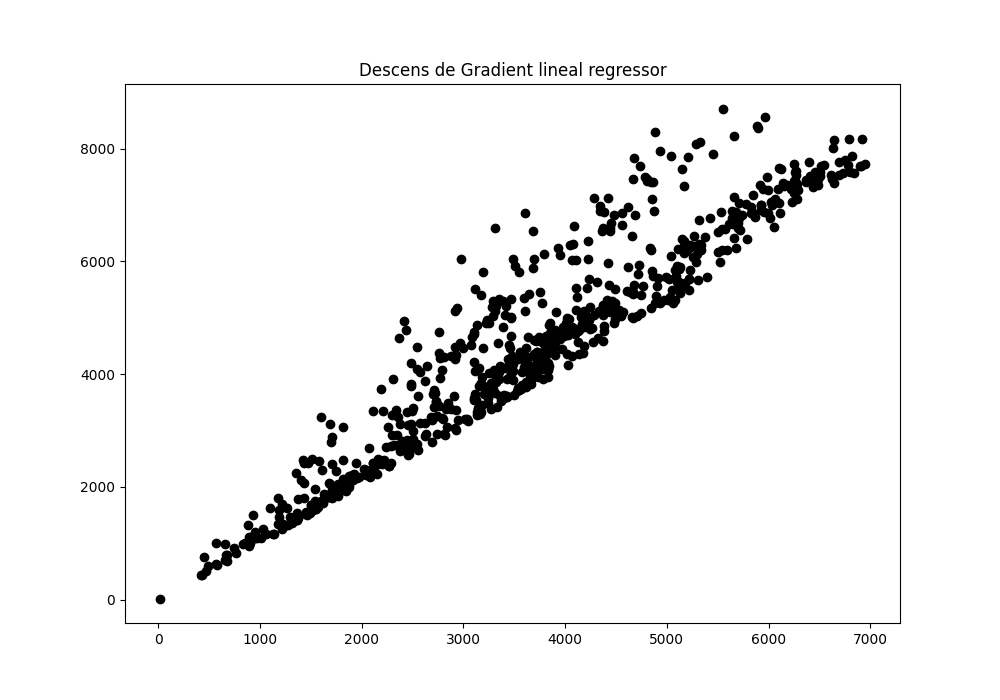

Text(0.5, 1.0, 'Descens de Gradient lineal regressor')

In [21]:
Xgraf,c,m=GradientDescent(X,Y,0.1,1000)

plt.scatter(X, Y, color='black')
plt.plot(X,Xgraf)
plt.gca().set_title("Descens de Gradient lineal regressor")

Hem volgut mostrar un gràfic 3D dels millors atributs, en el nostre cas "casual" i "registered" contra "cnt" que és el nostre atribut objectiu:

C:\Users\Jordi\AppData\Local\Temp\ipykernel_12964\1662983982.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(A,predX3D)[0]


<IPython.core.display.Javascript object>


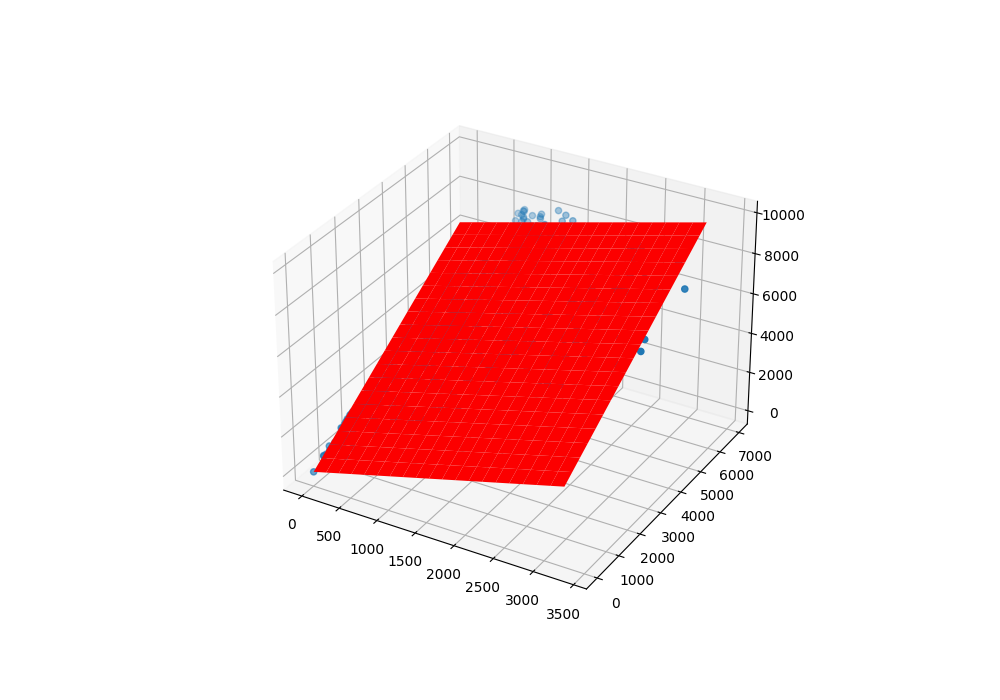

In [22]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.zeros((731,2))
x_val[ : , 0] = data[ : , 12]
x_val[ : , 1] = data[ : , 13]
y_val = data[:, 14]
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).add_subplot(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)